In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading a CSV file

In [2]:
sales = pd.read_csv("Amazon_sales.csv")

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          300 non-null    object 
 1   Country         300 non-null    object 
 2   Item Type       300 non-null    object 
 3   Sales Channel   300 non-null    object 
 4   Order Priority  300 non-null    object 
 5   Order Date      300 non-null    object 
 6   Order ID        300 non-null    int64  
 7   Ship Date       300 non-null    object 
 8   Units Sold      300 non-null    int64  
 9   Unit Price      300 non-null    float64
 10  Unit Cost       300 non-null    float64
 11  Total Revenue   300 non-null    float64
 12  Total Cost      300 non-null    float64
 13  Total Profit    300 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 32.9+ KB


In [7]:
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [9]:
sales.shape

(300, 14)

### Data Cleaning

In [5]:
sales.drop_duplicates(subset = 'Order ID', inplace = True)

In [7]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'])
sales = sales[sales['Order Date'] <= sales['Ship Date']]

In [9]:
sales.shape

(199, 14)

In [15]:
sales.to_csv('Amazon Sales (after cleaning).csv', index = False)

### Total profits in each region

In [19]:
sales.groupby('Region')["Total Profit"].sum().sort_values(ascending = False)

Region
Central America and the Caribbean    30919794.25
Sub-Saharan Africa                   30523195.40
Europe                               25859336.63
Middle East and North Africa         23217315.74
Asia                                 18563244.91
Australia and Oceania                16836309.61
North America                         1457942.76
Name: Total Profit, dtype: float64

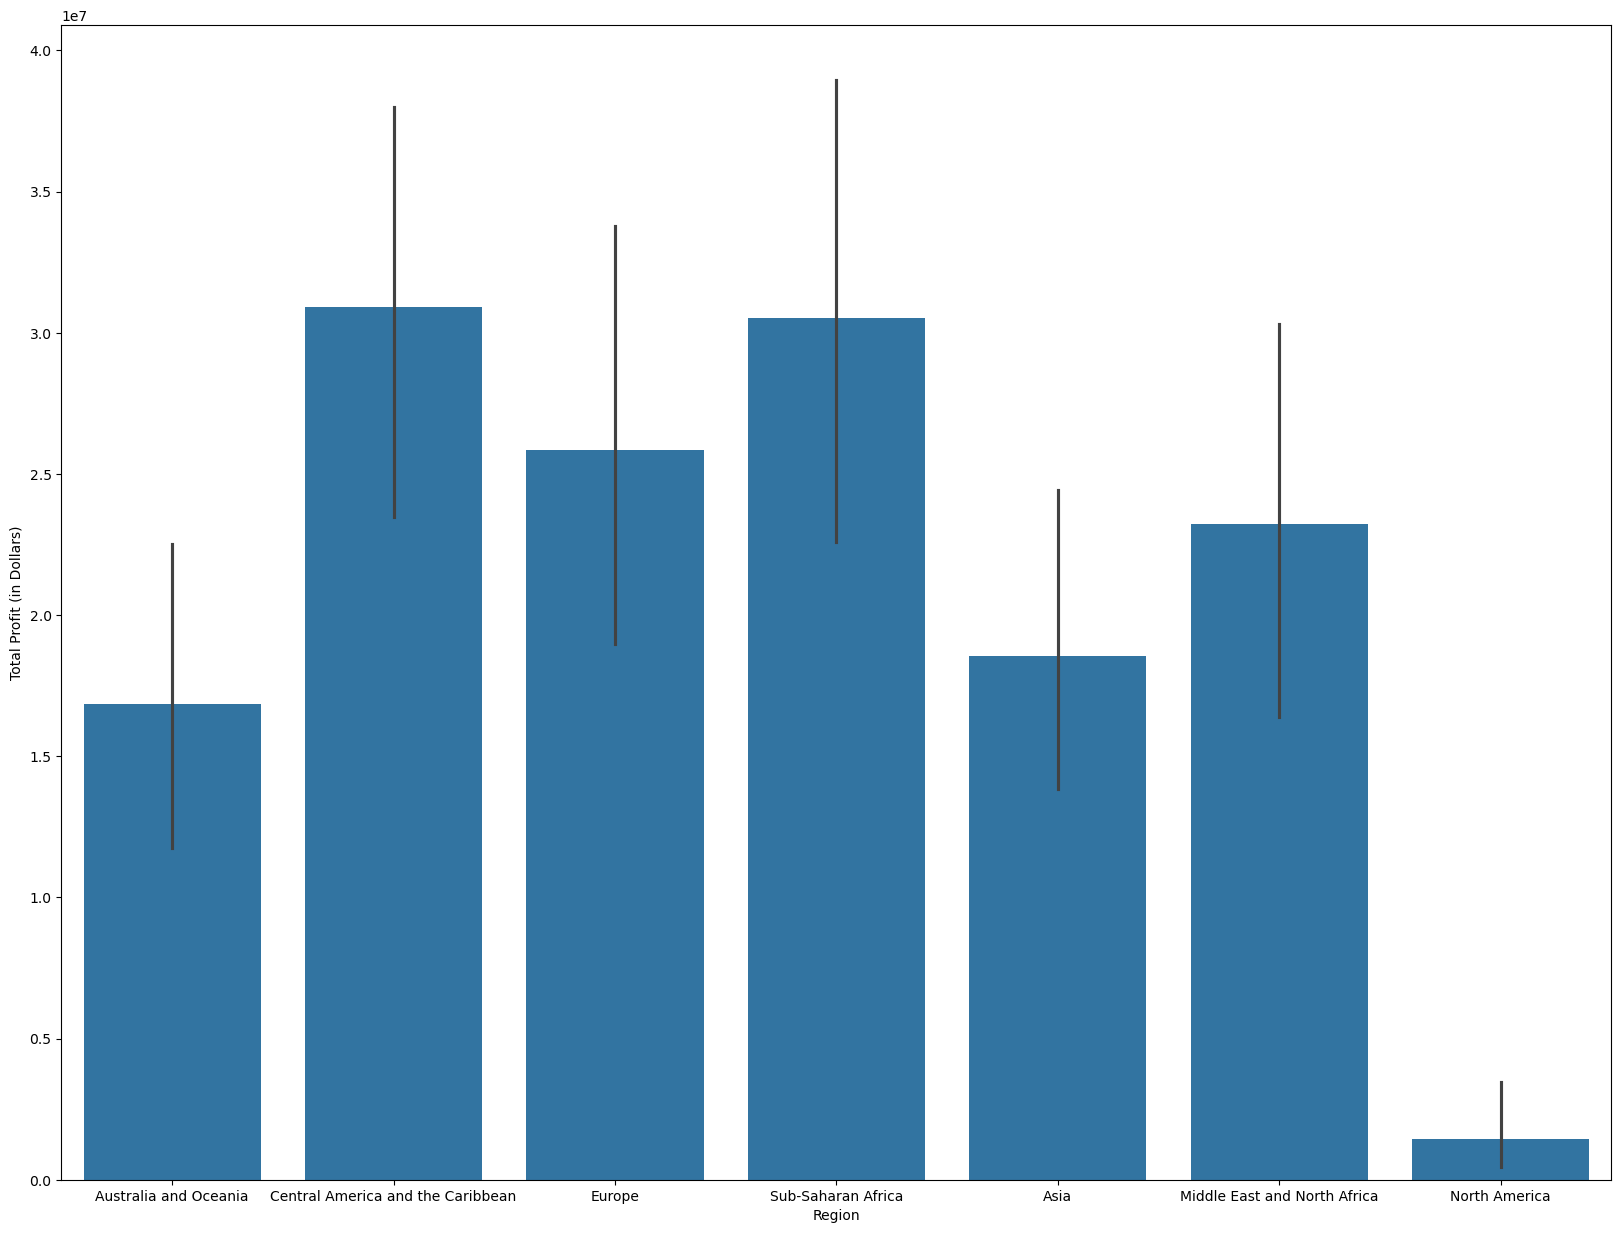

In [25]:
plt.figure(figsize=(20,15))
sns.barplot(x = 'Region', y = 'Total Profit', data = sales, estimator = sum)
plt.ylabel('Total Profit (in Dollars)')
plt.show()

### Total Units sold by Region and Sales Channel

In [35]:
sales.groupby('Region')["Units Sold"].sum().sort_values(ascending = False)

Region
Sub-Saharan Africa                   263670
Europe                               163217
Central America and the Caribbean    159451
Middle East and North Africa         125584
Australia and Oceania                121696
Asia                                 114815
North America                         19143
Name: Units Sold, dtype: int64

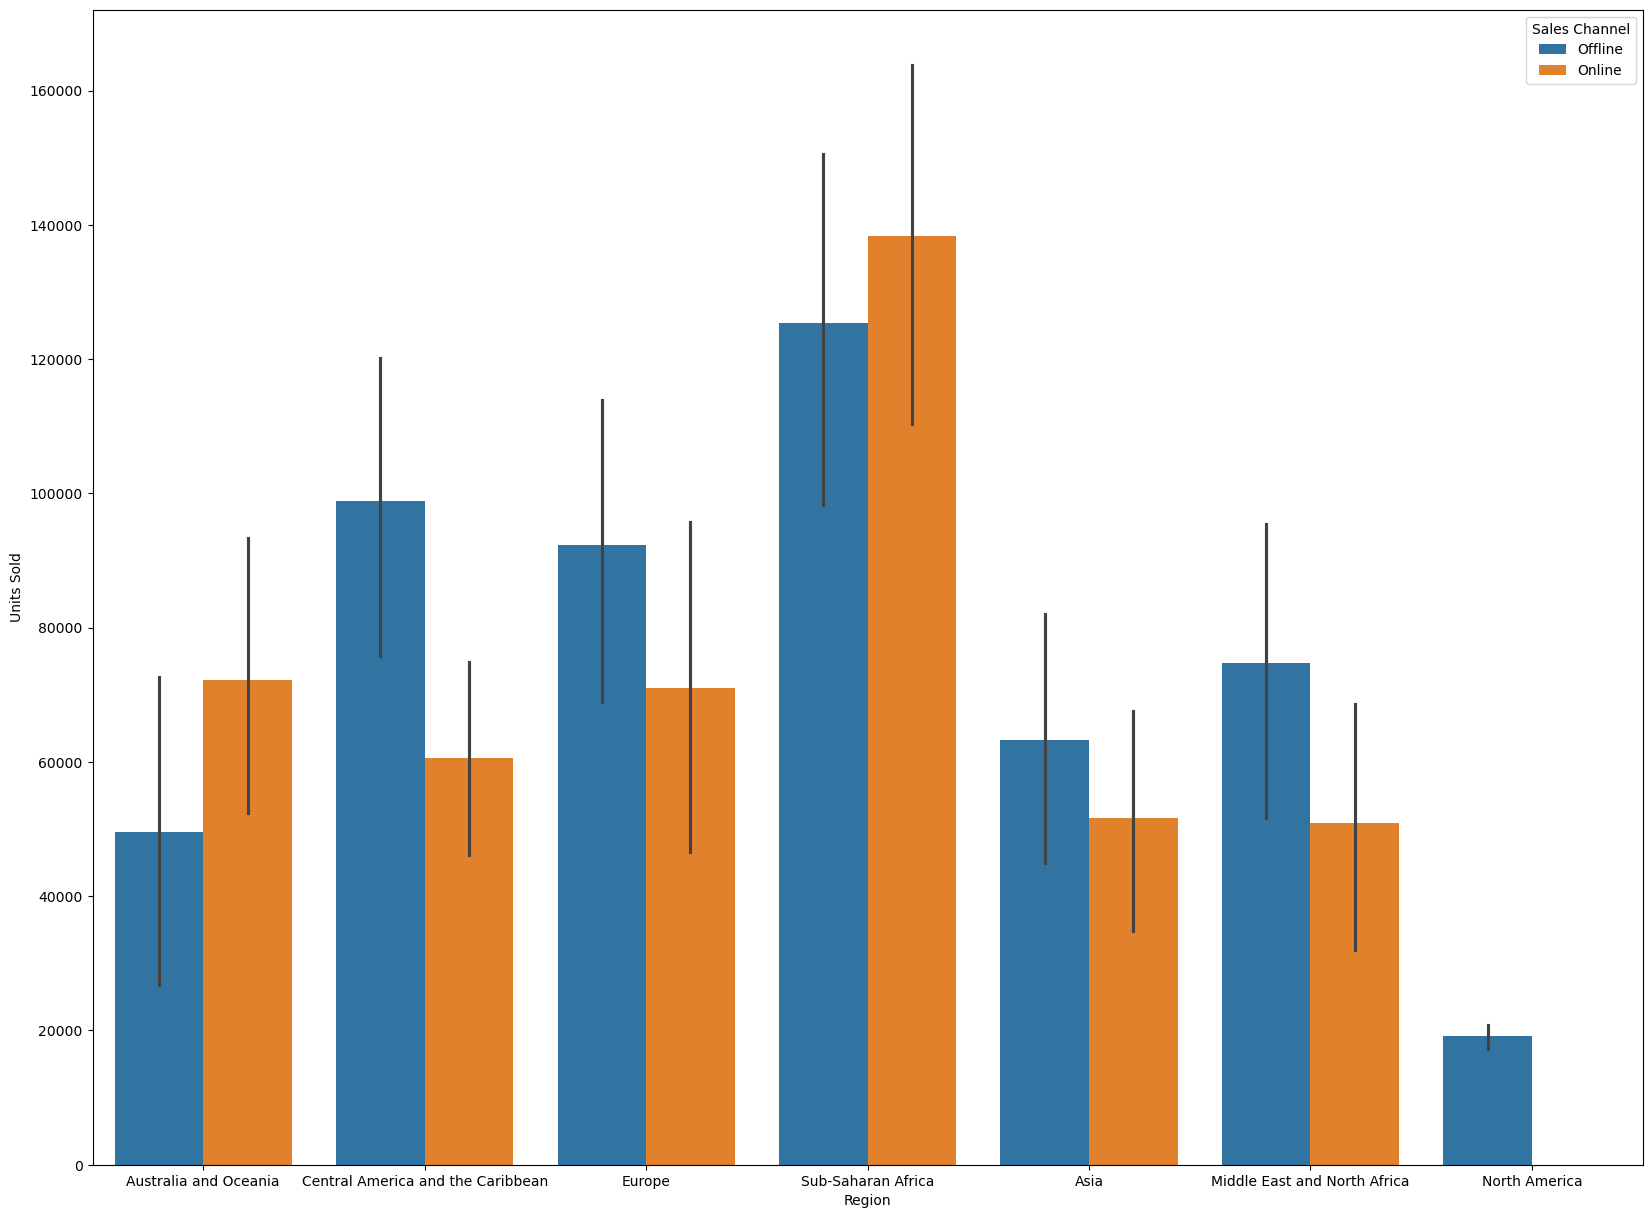

In [37]:
plt.figure(figsize=(20,15))
sns.barplot(x = 'Region', y = 'Units Sold', data = sales, hue = 'Sales Channel', estimator = sum)
plt.show()

### Distribution of Order Priorities with Categorical Differentiation

In [39]:
sales['Order Priority'].value_counts().sort_values(ascending = False)

Order Priority
L    61
H    55
C    42
M    41
Name: count, dtype: int64

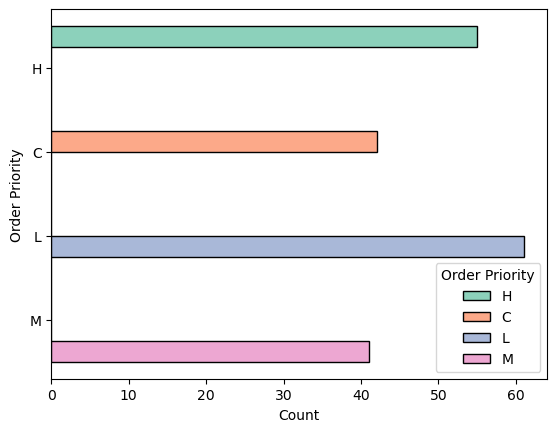

In [41]:
sns.histplot(y='Order Priority', data=sales, hue='Order Priority', multiple='dodge',  palette='Set2')
plt.show()

### Distribution of Order Priorities with Categorical Differentiation by Region wise

In [43]:
stacked_data = sales.pivot_table(index='Region', columns='Order Priority', values='Units Sold', aggfunc='sum')
stacked_data

Order Priority,C,H,L,M
Region,,,,
Asia,17420.0,22911.0,41287.0,33197.0
Australia and Oceania,53123.0,48767.0,12390.0,7416.0
Central America and the Caribbean,58661.0,23563.0,56122.0,21105.0
Europe,52489.0,40976.0,39744.0,30008.0
Middle East and North Africa,5731.0,35024.0,58221.0,26608.0
North America,6954.0,NaN,6422.0,5767.0
Sub-Saharan Africa,43581.0,77936.0,89961.0,52192.0


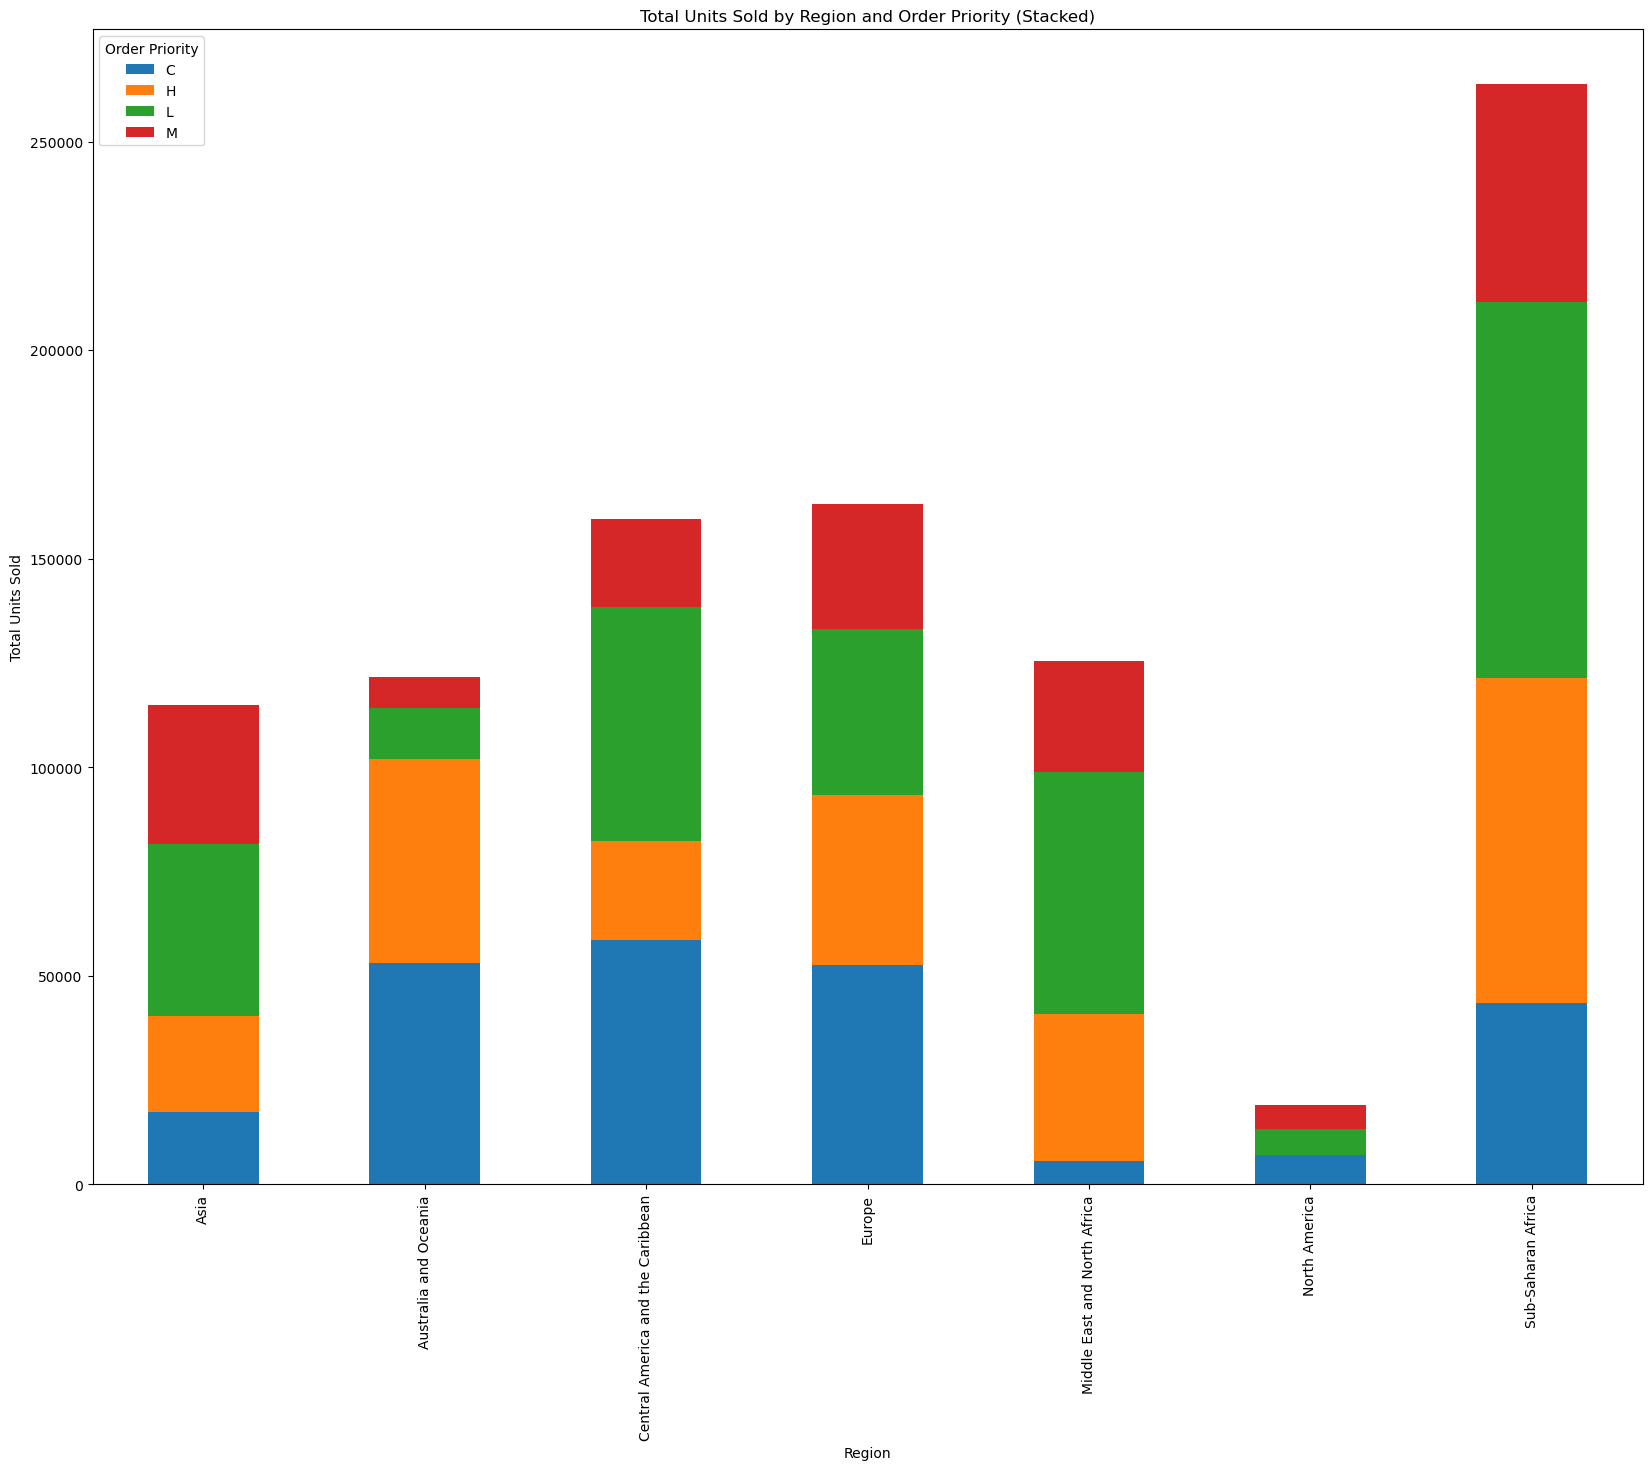

In [45]:
stacked_data.plot(kind='bar', stacked=True, figsize=(20, 15))
plt.xlabel('Region')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Region and Order Priority (Stacked)')
plt.legend(title='Order Priority')
plt.show()

### Item Type Distribution

In [47]:
item_type_distribution = sales['Item Type'].value_counts()
item_type_distribution

Item Type
Clothes            33
Cereal             29
Office Supplies    28
Fruits             23
Baby Food          19
Electronics        16
Cosmetics          13
Personal Care      10
Household           9
Beverages           8
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

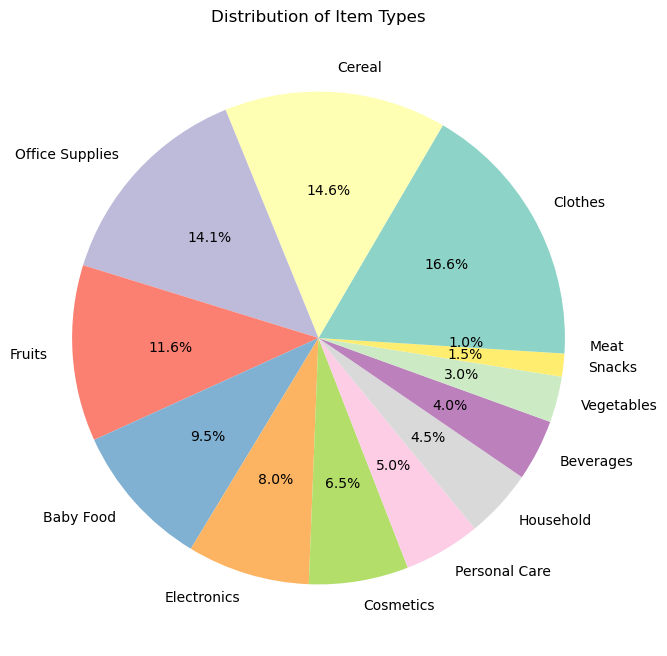

In [44]:
plt.figure(figsize=(8, 8))
plt.pie(item_type_distribution, labels=item_type_distribution.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Distribution of Item Types')
plt.show()

### Sorting the dataframe by Order Date

In [49]:
sales = sales.sort_values(by = 'Order Date')

In [48]:
sales.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
183,Sub-Saharan Africa,Tuvalu,Clothes,Offline,L,2010-01-10,919169347,2015-12-29,4218,429.74,202.76,1812643.32,855241.68,957401.64
226,Middle East and North Africa,Germany,Electronics,Offline,M,2010-01-16,574166630,2016-05-06,429,429.74,202.76,184358.46,86984.04,97374.42
228,Middle East and North Africa,Sao Tome and Principe,Cereal,Online,M,2010-01-17,626438202,2010-12-09,767,429.74,202.76,329610.58,155516.92,174093.66
130,Middle East and North Africa,Tuvalu,Clothes,Offline,L,2010-02-01,193051154,2016-01-22,5095,429.74,202.76,2189525.30,1033062.20,1156463.10
50,Europe,Albania,Clothes,Online,C,2010-02-02,385383069,2010-03-18,2269,109.28,35.84,247956.32,81320.96,166635.36


In [50]:
sales.tail(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
34,Sub-Saharan Africa,Djibouti,Snacks,Online,M,2017-02-25,756274640,2017-02-25,7327,152.58,97.44,1117953.66,713942.88,404010.78
40,Sub-Saharan Africa,Niger,Personal Care,Online,H,2017-03-11,699285638,2017-03-28,3015,81.73,56.67,246415.95,170860.05,75555.90
35,Central America and the Caribbean,Costa Rica,Personal Care,Offline,L,2017-05-08,456767165,2017-05-21,6409,81.73,56.67,523807.57,363198.03,160609.54
73,Sub-Saharan Africa,Djibouti,Cereal,Online,H,2017-05-20,555990016,2017-06-17,8656,205.70,117.11,1780539.20,1013704.16,766835.04
25,Europe,France,Cosmetics,Online,H,2017-05-22,898523128,2017-06-05,1815,437.20,263.33,793518.00,477943.95,315574.05


In [51]:
sales['Order Year'] = sales['Order Date'].dt.year

In [53]:
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Year
183,Sub-Saharan Africa,Tuvalu,Clothes,Offline,L,2010-01-10,919169347,2015-12-29,4218,429.74,202.76,1812643.32,855241.68,957401.64,2010
226,Middle East and North Africa,Germany,Electronics,Offline,M,2010-01-16,574166630,2016-05-06,429,429.74,202.76,184358.46,86984.04,97374.42,2010
228,Middle East and North Africa,Sao Tome and Principe,Cereal,Online,M,2010-01-17,626438202,2010-12-09,767,429.74,202.76,329610.58,155516.92,174093.66,2010
130,Middle East and North Africa,Tuvalu,Clothes,Offline,L,2010-02-01,193051154,2016-01-22,5095,429.74,202.76,2189525.30,1033062.20,1156463.10,2010
50,Europe,Albania,Clothes,Online,C,2010-02-02,385383069,2010-03-18,2269,109.28,35.84,247956.32,81320.96,166635.36,2010


### Total Revenue over the years

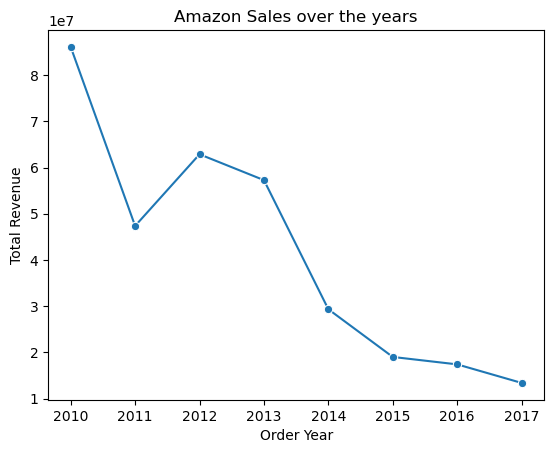

In [55]:
yearly_profit = sales.groupby('Order Year')['Total Revenue'].sum()
yearly_profit_df = yearly_profit.reset_index()
sns.lineplot(x = 'Order Year', y = 'Total Revenue', data = yearly_profit_df, marker = 'o')
plt.title("Amazon Sales over the years")
plt.show()

### Total Profits in each region

In [57]:
year_region_profit = sales.groupby(['Order Year', 'Region'])['Total Profit'].sum().reset_index()
year_region_profit

,Order Year,Region,Total Profit
0,2010,Asia,3128121.20
1,2010,Australia and Oceania,4088226.40
2,2010,Central America and the Caribbean,11484734.04
3,2010,Europe,12383307.71
4,2010,Middle East and North Africa,7170570.20
5,2010,Sub-Saharan Africa,3733325.30
6,2011,Asia,258532.75
7,2011,Australia and Oceania,2553978.96
8,2011,Central America and the Caribbean,4959900.18
9,2011,Europe,2956868.46


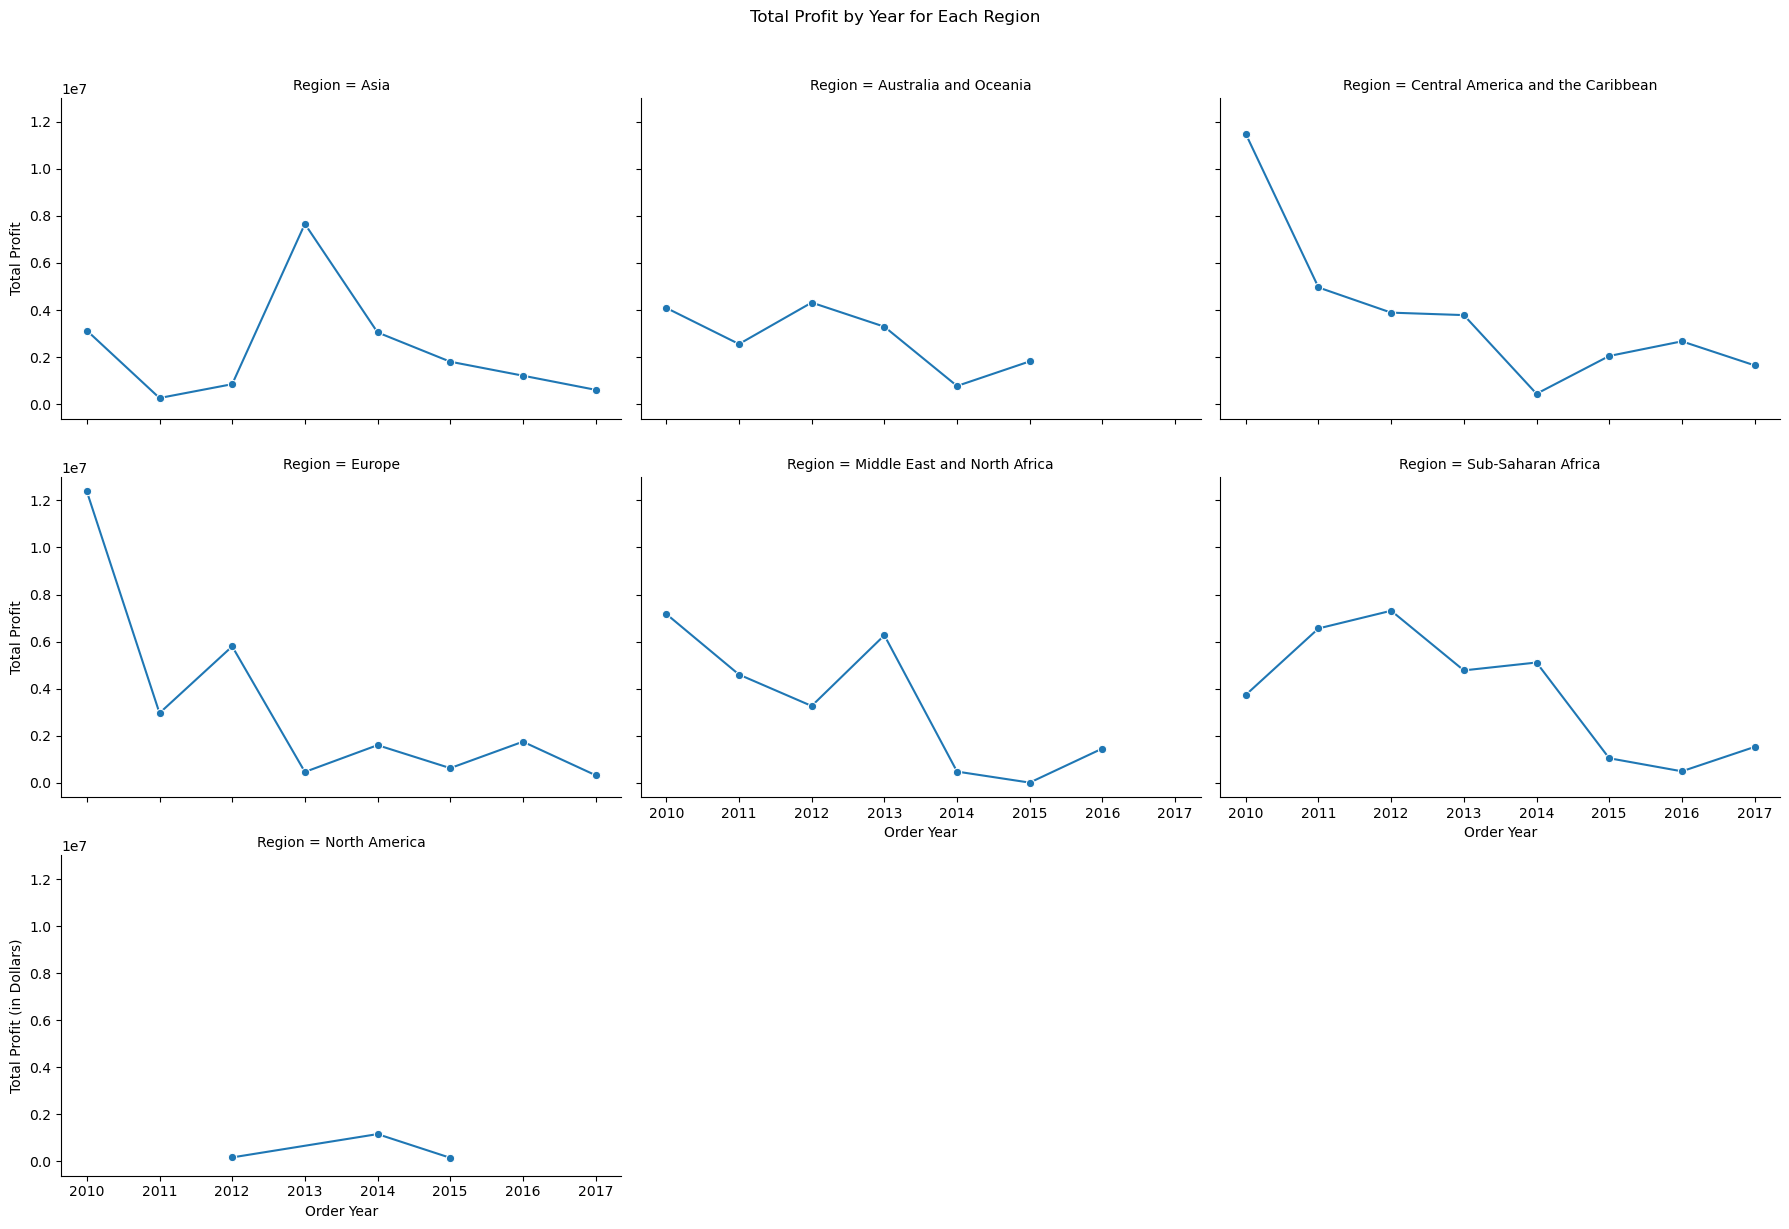

In [59]:
g = sns.FacetGrid(year_region_profit, col='Region', col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, 'Order Year', 'Total Profit', marker='o')
g.fig.suptitle('Total Profit by Year for Each Region', y=1.02)
g.tight_layout()
plt.ylabel('Total Profit (in Dollars)')
plt.show()

### Region Vs Sales Channel

In [61]:
rvs = pd.DataFrame({x_label: grp['Sales Channel'].value_counts()
    for x_label, grp in sales.groupby('Region')
})
rvs

,Asia,Australia and Oceania,Central America and the Caribbean,Europe,Middle East and North Africa,North America,Sub-Saharan Africa
Sales Channel,,,,,,,
Offline,14,10,16,18,14,3.0,29
Online,11,16,12,16,13,NaN,27


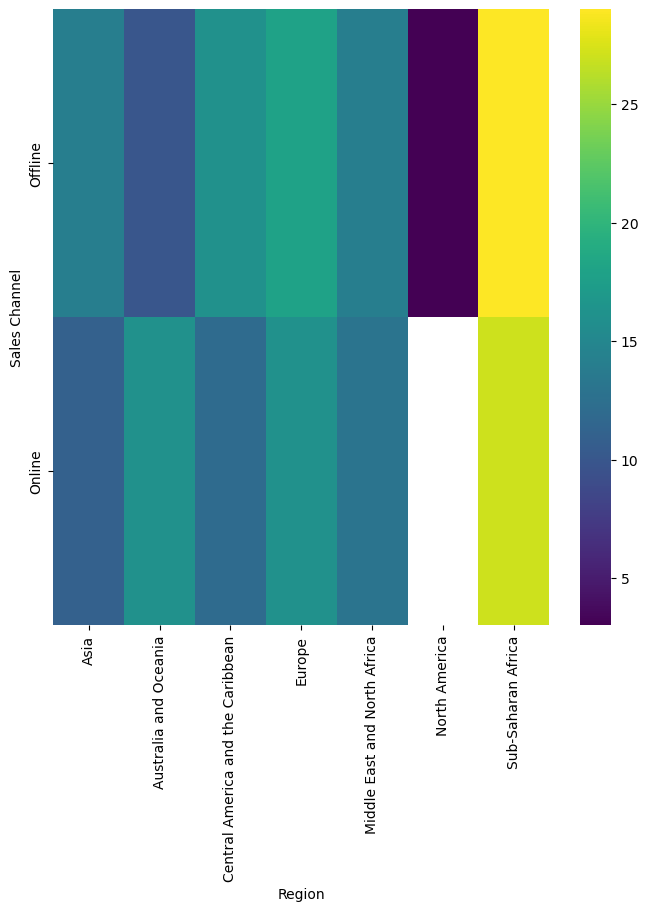

In [85]:
plt.subplots(figsize=(8, 8))
rvs = pd.DataFrame({x_label: grp['Sales Channel'].value_counts()
    for x_label, grp in sales.groupby('Region')
})
sns.heatmap(rvs, cmap='viridis')
plt.xlabel('Region')
plt.ylabel('Sales Channel')
plt.show()

### Top 5 countries with Highest profits

In [88]:
sales.groupby('Country')['Total Profit'].sum().sort_values(ascending = False).head(5)

Country
Rwanda                   17196689.13
Brazil                   14481097.02
Sao Tome and Principe    13978619.95
France                   12243146.07
Egypt                    11485188.00
Name: Total Profit, dtype: float64

### Top country in each region by Total Profits

In [98]:
regions = ['Asia', 'Australia and Oceania', 'Central America and the Caribbean', 'Europe', 'Central America and the Caribbean', 'North America', 'Sub-Saharan Africa']
for i in range(0, 7):
    c = sales[sales['Region'] == regions[i]]
    top_country = c.groupby('Country')['Total Profit'].sum().idxmax()
    top_profit = c.groupby('Country')['Total Profit'].sum().max()
    print(f"{regions[i]:<40} | Top Country: {top_country:<20} | Total Profit: ${top_profit:,.2f}")

Asia                                     | Top Country: France               | Total Profit: $2,662,021.44
Australia and Oceania                    | Top Country: Rwanda               | Total Profit: $6,936,054.84
Central America and the Caribbean        | Top Country: Sao Tome and Principe | Total Profit: $5,589,382.50
Europe                                   | Top Country: India                | Total Profit: $3,920,398.56
Central America and the Caribbean        | Top Country: Sao Tome and Principe | Total Profit: $5,589,382.50
North America                            | Top Country: Mexico               | Total Profit: $1,457,942.76
Sub-Saharan Africa                       | Top Country: Brazil               | Total Profit: $5,372,616.60


### Countries in each region with least total profits

In [101]:
regions = ['Asia', 'Australia and Oceania', 'Central America and the Caribbean', 'Europe', 'Central America and the Caribbean', 'North America', 'Sub-Saharan Africa']
for i in range(0, 7):
    c = sales[sales['Region'] == regions[i]]
    top_country = c.groupby('Country')['Total Profit'].sum().idxmin()
    top_profit = c.groupby('Country')['Total Profit'].sum().min()
    print(f"{regions[i]:<40} | Country: {top_country:<20} | Total Profit: ${top_profit:,.2f}")

Asia                                     | Country: Kyrgyzstan           | Total Profit: $7,828.12
Australia and Oceania                    | Country: New Zealand          | Total Profit: $5,270.67
Central America and the Caribbean        | Country: Nicaragua            | Total Profit: $127,722.96
Europe                                   | Country: Slovakia             | Total Profit: $10,795.23
Central America and the Caribbean        | Country: Nicaragua            | Total Profit: $127,722.96
North America                            | Country: Mexico               | Total Profit: $1,457,942.76
Sub-Saharan Africa                       | Country: Lesotho              | Total Profit: $23,150.46


### Top 5 countries in the world by Total Revenue

In [103]:
sales.groupby('Country')['Total Revenue'].sum().sort_values(ascending = False).head(5)

Country
Rwanda                   35128434.74
Brazil                   27416982.26
Sao Tome and Principe    26697840.58
France                   23375925.26
Egypt                    21744844.00
Name: Total Revenue, dtype: float64

### Total Units sold for each item across all regions

In [109]:
year_region_profit = sales.groupby(['Region', 'Item Type'])['Units Sold'].sum().reset_index()
year_region_profit

,Region,Item Type,Units Sold
0,Asia,Baby Food,13137
1,Asia,Cereal,26273
2,Asia,Clothes,22755
3,Asia,Cosmetics,6952
4,Asia,Electronics,4706
...,...,...,...
57,Sub-Saharan Africa,Meat,4767
58,Sub-Saharan Africa,Office Supplies,43370
59,Sub-Saharan Africa,Personal Care,19866
60,Sub-Saharan Africa,Snacks,11412


In [113]:
region_item = pd.pivot_table(
    sales,
    index = 'Region',
    values = 'Units Sold',
    columns = 'Item Type'
)
region_item.fillna(0, inplace = True)
region_item

Item Type,Baby Food,Beverages,Cereal,Clothes,Cosmetics,Electronics,Fruits,Household,Meat,Office Supplies,Personal Care,Snacks,Vegetables
Region,,,,,,,,,,,,,
Asia,6568.500000,0.000000,4378.833333,4551.000000,6952.000000,2353.000000,4218.50,6040.000000,0.0,5859.000000,4901.0,0.0,1928.000000
Australia and Oceania,6006.000000,9384.000000,2643.500000,5961.500000,9654.000000,3029.666667,4734.20,0.000000,5908.0,2818.200000,0.0,0.0,0.000000
Central America and the Caribbean,6934.500000,8156.000000,5707.000000,7117.666667,1705.000000,4354.600000,6231.50,8974.000000,0.0,4585.750000,6409.0,2225.0,0.000000
Europe,5662.166667,4892.000000,0.000000,4824.700000,6020.000000,1141.000000,7328.00,2397.500000,0.0,5583.750000,2671.5,0.0,171.000000
Middle East and North Africa,4545.333333,0.000000,6516.333333,5129.750000,7871.666667,3670.666667,2154.00,0.000000,0.0,2311.333333,0.0,0.0,0.000000
North America,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,6954.000000,0.0,0.000000,6094.5,0.0,0.000000
Sub-Saharan Africa,5645.000000,6666.666667,3591.222222,3982.000000,5846.000000,3306.500000,5606.75,3974.666667,4767.0,4337.000000,4966.5,5706.0,5341.333333


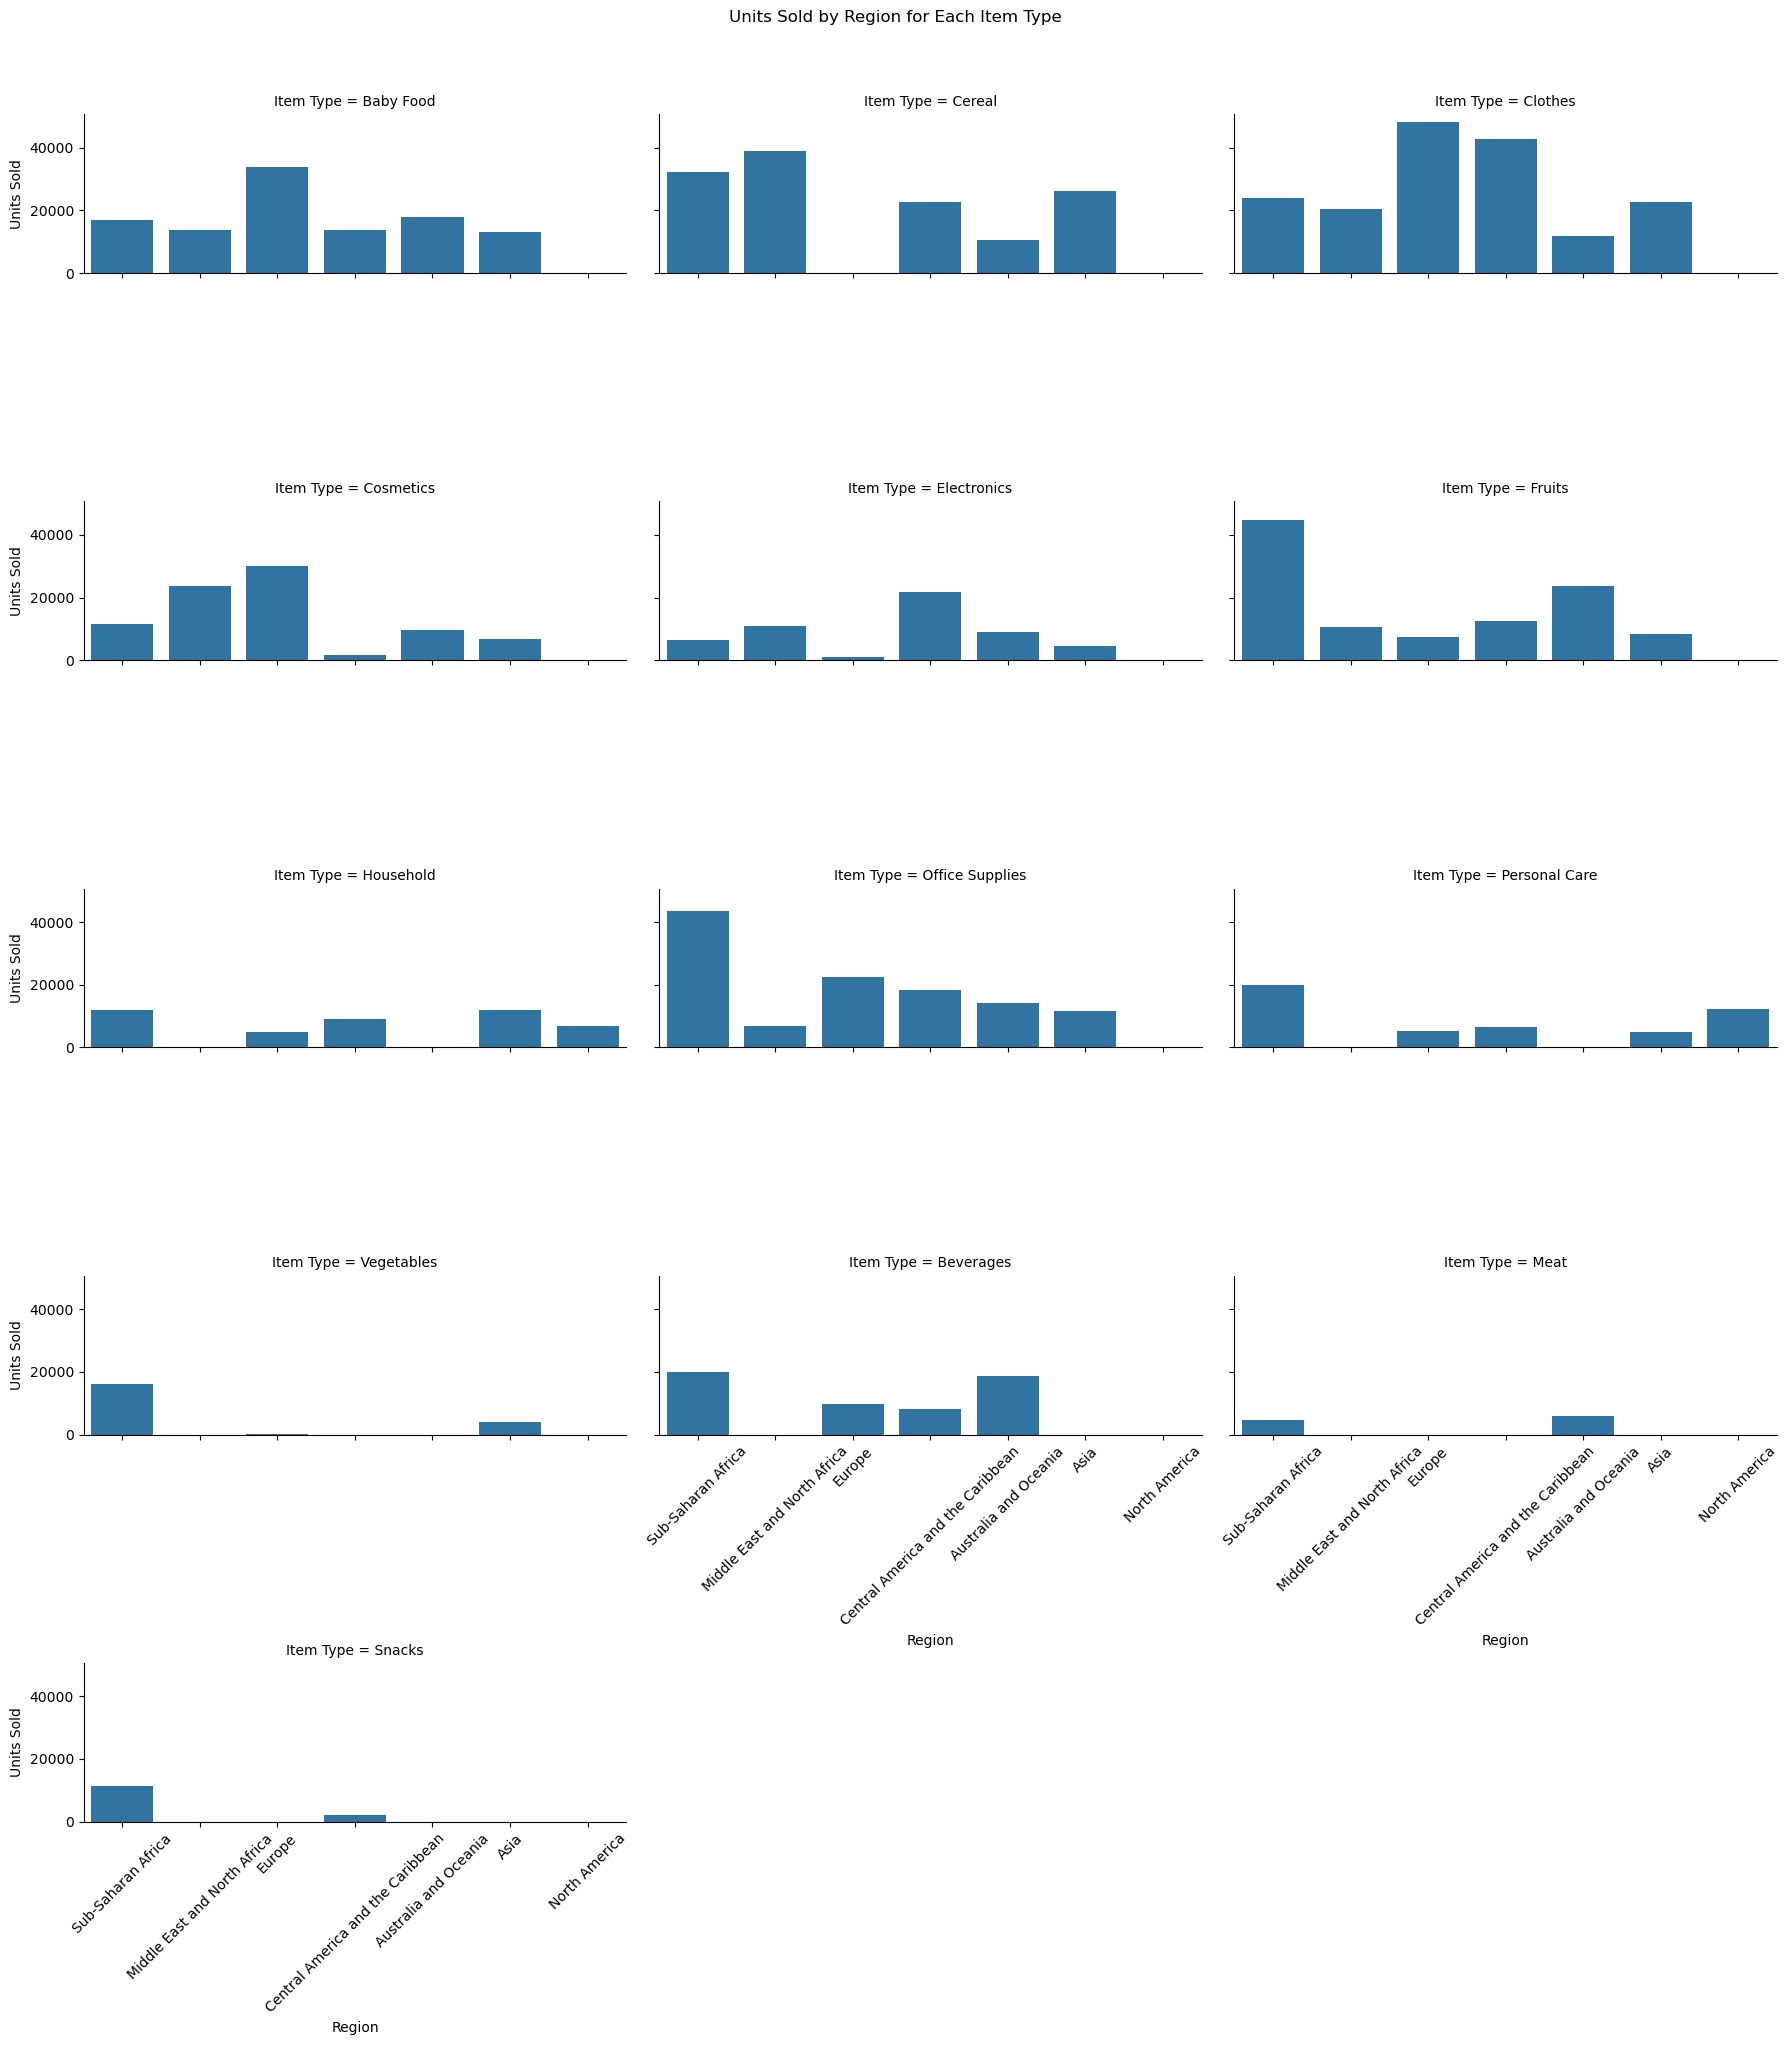

In [111]:
g = sns.FacetGrid(year_region_profit, col='Item Type', col_wrap=3, height=4, aspect=1.5)
g.map(sns.barplot, 'Region', 'Units Sold', order=sales['Region'].unique())
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)
g.fig.suptitle('Units Sold by Region for Each Item Type', y=1.02)
g.fig.subplots_adjust(bottom=0.2)  
g.tight_layout()
plt.show()

### Countries with highest profits booked under 'Clothes' section

In [116]:
clothes = sales[sales['Item Type'] == 'Clothes']
clothes.groupby('Country')['Total Profit'].sum().sort_values(ascending = False).head(5)

Country
Tuvalu    4230453.24
Russia    3697958.16
Brazil    3677756.94
Egypt     2330403.66
India     2040550.20
Name: Total Profit, dtype: float64

### Countries with highest profits booked under 'Electronics' section

In [119]:
electronics = sales[sales['Item Type'] == 'Electronics']
electronics.groupby('Country')['Total Profit'].sum().sort_values(ascending = False).head(5)

Country
Rwanda                   4729128.30
Sao Tome and Principe    2041912.08
Russia                   1657407.96
Brazil                   1501018.74
France                   1366419.60
Name: Total Profit, dtype: float64

#  Region : ASIA

### Total profits in each country present in ASIA

In [133]:
Asia = sales[sales['Region'] == 'Asia']
asia = pd.pivot_table(
    Asia,
    index = 'Country',
    values = ['Units Sold','Total Profit'])
asia_sorted = asia.sort_values(by = 'Total Profit', ascending = False)
asia_sorted

,Total Profit,Units Sold
Country,,
Brazil,2144734.02,9449.0
Egypt,2060297.46,9077.0
France,1331010.72,5864.0
Sri Lanka,1208744.24,6952.0
Germany,939470.22,4139.0
Myanmar,901385.85,7090.0
Brunei,846885.00,6708.0
Rwanda,748012.59,3295.5
Turkmenistan,633629.20,4420.0


### Total Units sold by each Country in ASIA With Item Types

In [136]:
asia_item = pd.pivot_table(
    Asia,
    index = 'Country',
    columns = 'Item Type',
    values = 'Total Profit')
asia_item.fillna(0, inplace = True)
asia_item

Item Type,Baby Food,Cereal,Clothes,Cosmetics,Electronics,Fruits,Household,Office Supplies,Personal Care,Vegetables
Country,,,,,,,,,,
Bangladesh,0.00,0.00,606834.72,0.00,0.00,0.00,0.0,0.0,0.00,0.00
Brazil,0.00,2144734.02,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
Brunei,0.00,0.00,0.00,0.00,0.00,0.00,0.0,846885.0,0.00,0.00
Egypt,2060297.46,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
France,0.00,1419986.88,1242034.56,0.00,0.00,0.00,0.0,0.0,0.00,0.00
Germany,0.00,939470.22,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
Grenada,0.00,372928.14,251947.80,0.00,0.00,0.00,0.0,0.0,0.00,0.00
Kyrgyzstan,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,7828.12
Laos,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,235601.16


### Average shipping time in ASIA over the years

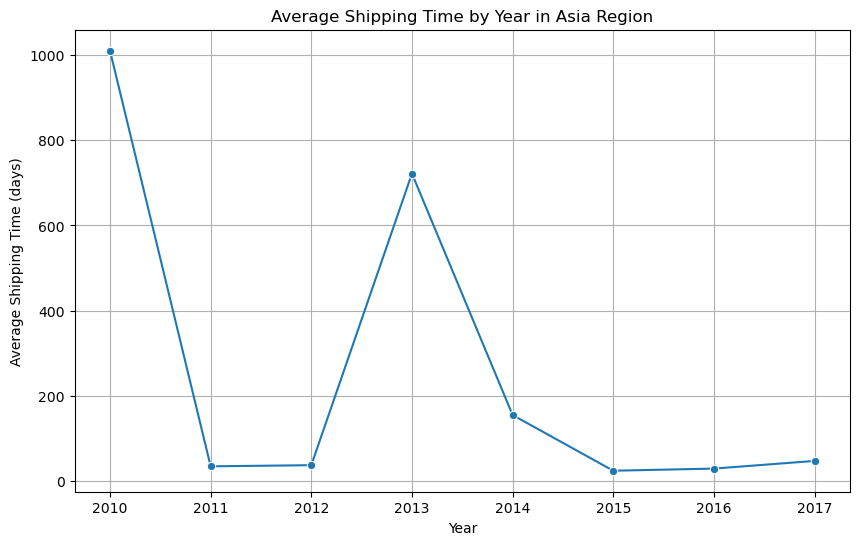

In [148]:
asia_sales = sales[sales['Region'] == 'Asia'].copy()
asia_sales.loc[:, 'time'] = (asia_sales['Ship Date'] - asia_sales['Order Date']).dt.days
asia_sales.loc[:, 'Year'] = asia_sales['Order Date'].dt.year
avg_shipping_time_by_year = asia_sales.groupby('Year')['time'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_shipping_time_by_year, x='Year', y='time', marker='o')
plt.title('Average Shipping Time by Year in Asia Region')
plt.xlabel('Year')
plt.ylabel('Average Shipping Time (days)')
plt.grid(True)
plt.show()

# The End